<a href="https://colab.research.google.com/github/211111237/Group-4-s-Deep-Learning/blob/main/manggo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Google Drive untuk akses dataset
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:

# Import library yang diperlukan
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from google.colab.patches import cv2_imshow

In [ ]:
# Menyiapkan path dataset
path = "/content/drive/MyDrive/Colab Notebooks/mango"
os.chdir(path)

In [ ]:

# Mengatur direktori train dan test
train_dir = os.path.join(path, 'train')
test_dir = os.path.join(path, 'test')

In [ ]:
# Directory training untuk gambar mangga matang
train_ripe_dir = os.path.join(train_dir, 'ripe_mango')

# Directory training untuk gambar mangga belum matang
train_unripe_dir = os.path.join(train_dir, 'unripe_mango')

# Directory testing untuk gambar mangga matang
test_ripe_dir = os.path.join(test_dir, 'ripe_mango')

# Directory testing untuk gambar mangga belum matang
test_unripe_dir = os.path.join(test_dir, 'unripe_mango')

In [ ]:
# Cek nama file di setiap folder
train_ripe_fnames = os.listdir(train_ripe_dir)
print(train_ripe_fnames[:10])

train_unripe_fnames = os.listdir(train_unripe_dir)
print(train_unripe_fnames[:10])

['Fresh-12_jpg.rf.c8b0c7774a55a725a4c34a791e16e4ee.jpg', 'Fresh-159_jpg.rf.e3957398e61a10b2ac2a2988c841fc0f.jpg', 'Fresh-254_jpg.rf.751db542f1b57a4b54de92f7a6722afd.jpg', 'Fresh-148_jpg.rf.6acb88f015e4ca2dc609b426e79e45c5.jpg', 'Fresh-115_jpg.rf.24316ad838a3741c02e1dd9534ff861b.jpg', 'Fresh-158_jpg.rf.e73a5136c35acfd734ea71ab8e9ae9ca.jpg', 'Fresh-282_jpg.rf.8f60fb8f9b7fbaa69d5d6c044603bb20.jpg', 'Fresh-267_jpg.rf.1c04cbfe54584627aaa96cf6be21115e.jpg', 'Fresh-273_jpg.rf.ac5ecbbaf5a748da67913d29bbb76c59.jpg', 'Fresh-102_jpg.rf.80aba72158b45a14665cc79e597e7c01.jpg']
['Roten-114_jpg.rf.a1018aeeb25fc170f95fa030faa5cec9.jpg', 'Roten-174_jpg.rf.ca8568c052fc3204d3c545955e4482d3.jpg', 'Roten-15_jpg.rf.283ed696eb83b9da318b335bcaac4336.jpg', 'Roten-17_jpg.rf.4ff67bf329c25b3debb6f0b0dde64931.jpg', 'Roten-133_jpg.rf.a9be733beb9b7865a065ce1daf708086.jpg', 'Roten-104_jpg.rf.7bcbb17a05ffb32251118b1470d1adf0.jpg', 'Roten-179_jpg.rf.f4554fe0d62744a7879ee3b82bc020cb.jpg', 'Roten-142_jpg.rf.0f880c8031cfb7

In [ ]:
# Menghitung banyak file input
print('Total training ripe mango images:', len(train_ripe_fnames))
print('Total training unripe mango images:', len(train_unripe_fnames))
print('Total testing ripe mango images:', len(os.listdir(test_ripe_dir)))
print('Total testing unripe mango images:', len(os.listdir(test_unripe_dir)))

Total training ripe mango images: 315
Total training unripe mango images: 276
Total testing ripe mango images: 315
Total testing unripe mango images: 276


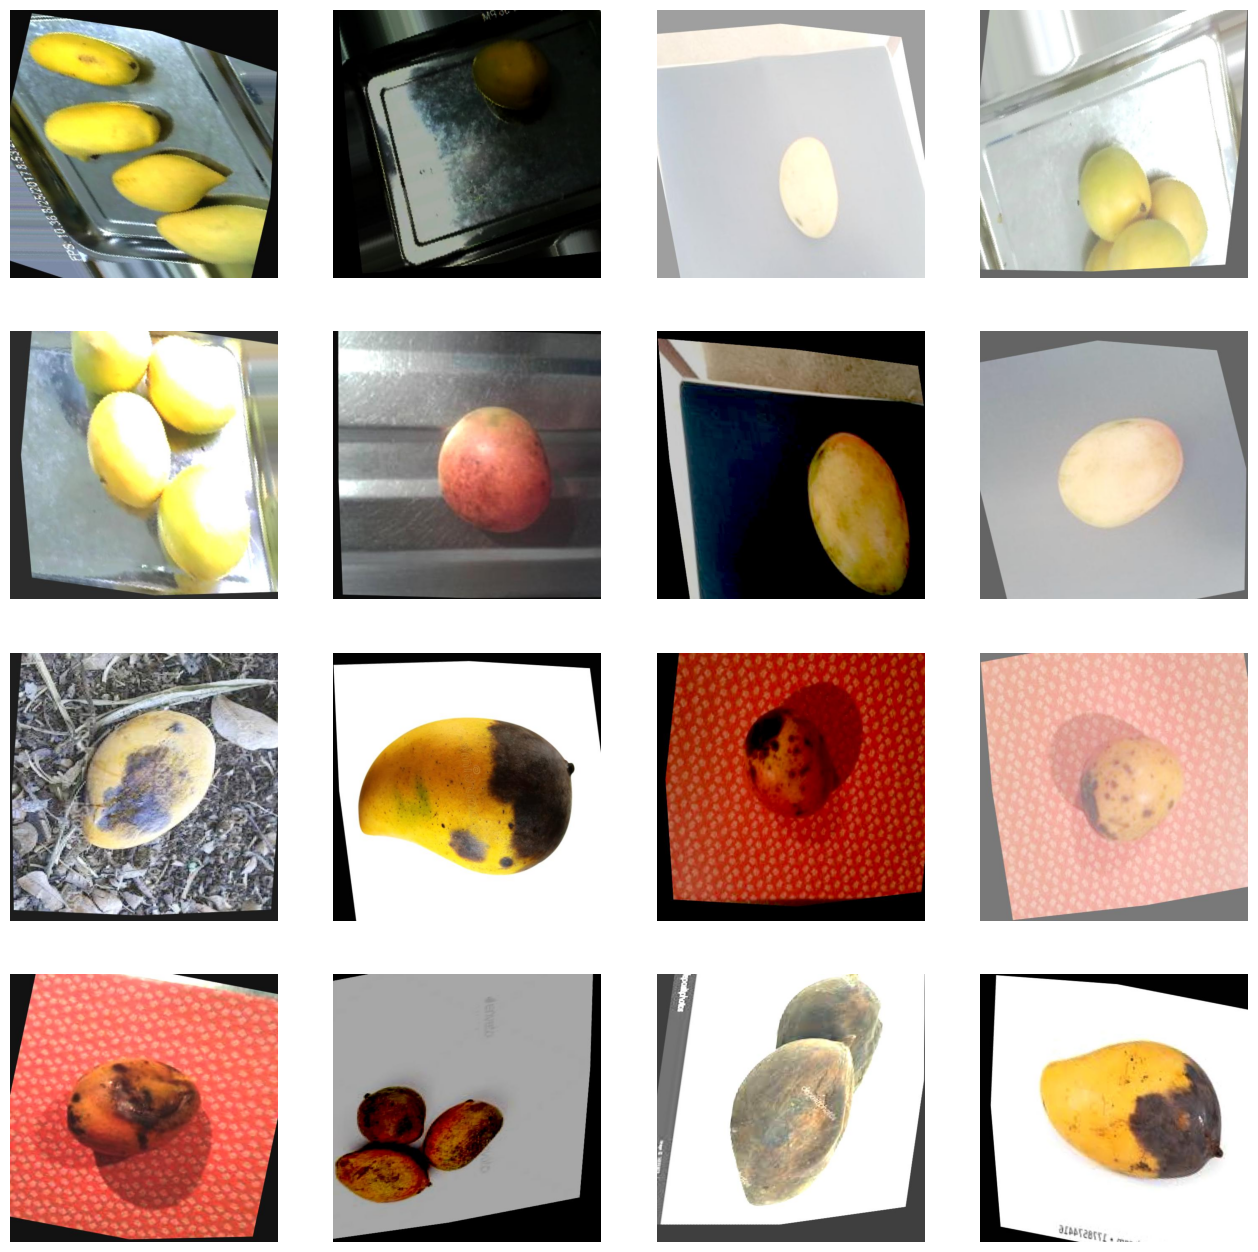

In [ ]:

# Menampilkan sampel gambar mangga matang dan belum matang
nrows = 4
ncols = 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_ripe_pix = [os.path.join(train_ripe_dir, fname)
                 for fname in train_ripe_fnames[pic_index-8:pic_index]]
next_unripe_pix = [os.path.join(train_unripe_dir, fname)
                   for fname in train_unripe_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_ripe_pix + next_unripe_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')
  img = plt.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
# Membangun arsitektur model CNN
img_input = layers.Input(shape=(150, 150, 3))

# Convolution layer 1
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Convolution layer 2
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Convolution layer 3
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Fully connected layers
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
output = layers.Dense(1, activation='sigmoid')(x)

# Menggabungkan input dan output menjadi model
model = Model(img_input, output)
model.summary()

# Kompilasi model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Menyiapkan data generator untuk training dan validasi
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       9,470,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,494,561 (36.22 MB)

 Trainable params: 9,494,561 (36.22 MB)

 Non-trainable params: 0 (0.00 B)

Found 591 images belonging to 2 classes.
Found 591 images belonging to 2 classes.


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 19/100 ━━━━━━━━━━━━━━━━━━━━ 4:24 3s/step - accuracy: 0.5301 - loss: 1.1328

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 303s 3s/step - accuracy: 0.5832 - loss: 0.9187 - val_accuracy: 0.6091 - val_loss: 0.6651
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 51s 275ms/step - accuracy: 0.7120 - loss: 0.5687 - val_accuracy: 0.7817 - val_loss: 0.4671
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 36s 228ms/step - accuracy: 0.8093 - loss: 0.4671 - val_accuracy: 0.7970 - val_loss: 0.3991
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 226ms/step - accuracy: 0.8185 - loss: 0.3931 - val_accuracy: 0.7479 - val_loss: 0.5374
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 273ms/step - accuracy: 0.8604 - loss: 0.3311 - val_accuracy: 0.9002 - val_loss: 0.2371
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 272ms/step - accuracy: 0.8759 - loss: 0.2564 - val_accuracy: 0.8968 - val_loss: 0.2186
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 233ms/step - accuracy: 0.8650 - loss: 0.2694 - val_accuracy: 0.9019 - val_loss: 0.2511
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 247ms/step - accuracy: 0.9195 - loss: 0.2055 - val_a

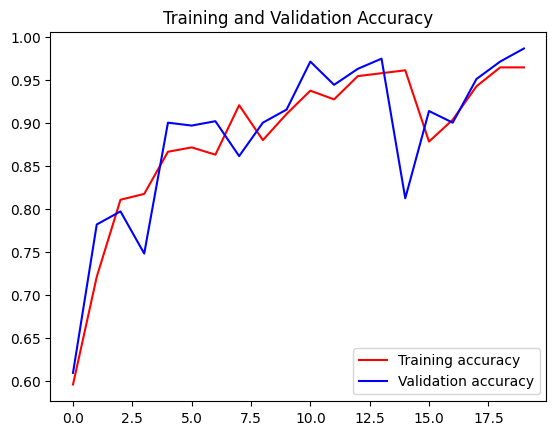

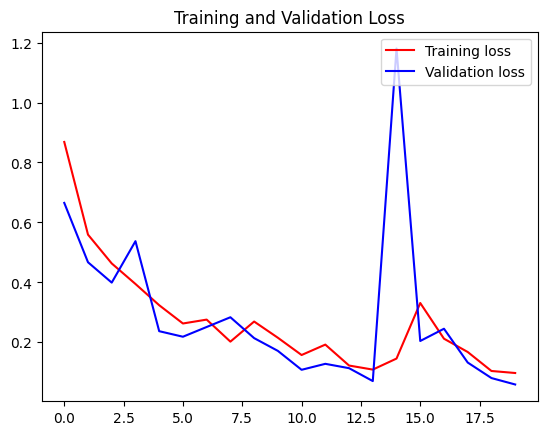

In [ ]:
# Melatih model
history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50)

# Visualisasi akurasi dan loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower right')
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend(loc='upper right')
plt.show()

#Note
Unripe  mango = model menganggap mango belum matang,
ripe mango = model menganggap mango tesebut sudah matang

In [ ]:
# Menguji model dengan gambar tunggal
img_path = '/content/drive/MyDrive/Colab Notebooks/mango/test/unripe_mango/Roten-106_jpg.rf.3c40a1a15025a451de22145c95923972.jpg'  # Ganti dengan path gambar mangga

img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x /= 255.0

# Prediksi gambar
preds = model.predict(x)
if preds[0] < 0.5:
    print("Prediction: Unripe Mango")
else:
    print("Prediction: Ripe Mango")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction: Ripe Mango
